# Project 4 - Spam Detection using Naive Bayes Classifiers

## Project Description
<p>This project is adapting the tutorial notebook by jakevdp which can be found at [this address](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/05.05-Naive-Bayes.ipynb). <br>A changelog which details the changes made will be included to point out where the code was adapted to either better suit this specific application or to try and improve the accuracy of the model when applied to this project.<br>In this project, I will attempt to predict whether or not a particular piece of text, was a genuine email or a spam email based on the text contents.<p>

## Code
### Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

C:\Users\SKy\AppData\Local\Temp\ipykernel_23272\2990391754.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Import Dataset

In [8]:
path = "spam.csv"
df = pd.read_csv(path, encoding="ANSI")

## Data Exploration

In [9]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [10]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [13]:
df['v1'].value_counts()/len(df)

v1
ham     0.865937
spam    0.134063
Name: count, dtype: float64

## Data Preprocessing

<p>Drop unneeded columns.</p>

In [14]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

<p> Rename columns to be more representative. </p>

In [15]:
col_names = ['SPAM', 'TEXT']

df.columns = col_names

df.columns

Index(['SPAM', 'TEXT'], dtype='object')

<p> Check for any null values </p>

In [16]:
df[df.isnull().any(axis=1)].count()

SPAM    0
TEXT    0
dtype: int64

## Model Creation

### Feature Preparation

<p> Prepare feature vector and dependent variable. Variable to be predicted is SPAM. Reshape is used to flatten both arrays.</p>

In [17]:
X = df.drop(['SPAM'], axis=1)
X = X.values.reshape(-1)
y = df['SPAM']
y = y.values.reshape(-1)

In [18]:
X

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

<p> Use a label encoder to encode target variable. O for ham and 1 for spam </p>

In [19]:
from sklearn.preprocessing import LabelEncoder
labels = ['ham','spam']
lab_encoder = LabelEncoder()
y = lab_encoder.fit_transform(y)

In [20]:
y

array([0, 0, 1, ..., 0, 0, 0])

<p> Create training and test data </p>

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [22]:
X_train.shape, X_test.shape

((3900,), (1672,))

In [23]:
y_train.shape, y_test.shape

((3900,), (1672,))

In [24]:
y

array([0, 0, 1, ..., 0, 0, 0])

<p> Create pipeline to encode text and setup multinomial nayes bayes algorithm </p>

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

<p>Train model</p>

In [26]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

<p>Run model on test data</p>

In [27]:
y_pred = model.predict(X_test)

<p> Create confusion matrix </p>

Text(113.9222222222222, 0.5, 'predicted label')

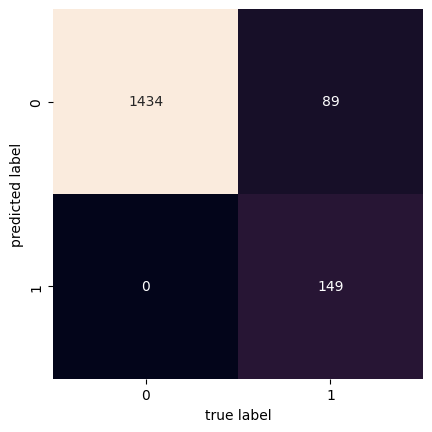

In [28]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

<p> Create metrics report </p>

In [29]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1434
           1       1.00      0.63      0.77       238

    accuracy                           0.95      1672
   macro avg       0.97      0.81      0.87      1672
weighted avg       0.95      0.95      0.94      1672



In [30]:
new_pred = model.predict(["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"])
new_pred

array([1])

In [31]:
new_pred = model.predict(["John, will be in town in 5 mins"])
new_pred

array([0])

In [32]:
from sklearn.metrics import accuracy_score

<p>Function to test variance of various algorithms over different splits of training and test data</p>

In [33]:
def evaluate_variance(X, y, num_iterations, test_size, textEncoder, modelType, random_state=True):
    accuracy_scores = []

    if not random_state:
        num_iterations = 10
        
    for i in range(num_iterations):

        random_states = [12345, 54321, 32145, 43125, 23145, 0, 10, 20, 30, 40, 50]

        if random_state:
            random_states = np.random.randint(1, 100000, size=num_iterations)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_states[i])
        
        # Create and fit the model
        model = make_pipeline(textEncoder, modelType)
        model.fit(X_train, y_train)
        
        # Make predictions and calculate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("Run ", i, " with random state: ", random_states[i], ": ",accuracy)
        accuracy_scores.append(accuracy)
        report = classification_report(y_test, y_pred)

    # Calculate the average accuracy and variance
    average_accuracy = np.mean(accuracy_scores)
    variance_accuracy = np.var(accuracy_scores)
        
    return average_accuracy, variance_accuracy, report

In [34]:
textEncoder = TfidfVectorizer()
modelType = MultinomialNB()
avg_accuracy, variance, report = evaluate_variance(X, y,20,0.3,textEncoder, modelType, False)
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Variance in Accuracy: {variance:.8f}")
print(report)

Run  0  with random state:  12345 :  0.9449760765550239
Run  1  with random state:  54321 :  0.9617224880382775
Run  2  with random state:  32145 :  0.958732057416268
Run  3  with random state:  43125 :  0.9479665071770335
Run  4  with random state:  23145 :  0.9557416267942583
Run  5  with random state:  0 :  0.9467703349282297
Run  6  with random state:  10 :  0.9563397129186603
Run  7  with random state:  20 :  0.9521531100478469
Run  8  with random state:  30 :  0.958732057416268
Run  9  with random state:  40 :  0.9563397129186603
Average Accuracy: 0.9539
Variance in Accuracy: 0.00002919
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1457
           1       1.00      0.66      0.80       215

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.89      1672
weighted avg       0.96      0.96      0.95      1672



#### Feature Engineering

<p> Test if removing case has any effect on accuracy of predictions </p>

In [35]:
df_lower = df

In [36]:
df_lower['TEXT'] = df_lower['TEXT'].str.lower()

In [37]:
df_lower['TEXT']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: TEXT, Length: 5572, dtype: object

<p>Turns out there is a lowercase option for TFidVectorizer(lowercase=True), however ignoring case has no effect on model performance </p>

In [38]:
X = df_lower.drop(['SPAM'], axis=1)
X = X.values.ravel()
y = df_lower['SPAM']
y = y.values.ravel()

textEncoder = TfidfVectorizer()
modelType = MultinomialNB()
avg_accuracy, variance, report = evaluate_variance(X, y,20,0.3,textEncoder, modelType, False)
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Variance in Accuracy: {variance:.8f}")
print(report)

Run  0  with random state:  12345 :  0.9449760765550239
Run  1  with random state:  54321 :  0.9617224880382775
Run  2  with random state:  32145 :  0.958732057416268
Run  3  with random state:  43125 :  0.9479665071770335
Run  4  with random state:  23145 :  0.9557416267942583
Run  5  with random state:  0 :  0.9467703349282297
Run  6  with random state:  10 :  0.9563397129186603
Run  7  with random state:  20 :  0.9521531100478469
Run  8  with random state:  30 :  0.958732057416268
Run  9  with random state:  40 :  0.9563397129186603
Average Accuracy: 0.9539
Variance in Accuracy: 0.00002919
              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1457
        spam       1.00      0.66      0.80       215

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.89      1672
weighted avg       0.96      0.96      0.95      1672



<p> Next test is removing of punctuation </p>

In [39]:
import string

In [40]:
df_punc = df

In [41]:
#Docs: https://blog.enterprisedna.co/python-remove-punctuation-from-string/
df_punc['TEXT'] = df_punc['TEXT'].apply(lambda x:x.translate(str.maketrans('','',string.punctuation)))

In [42]:
X = df_punc.drop(['SPAM'], axis=1)
X = X.values.ravel()
y = df_punc['SPAM']
y = y.values.ravel()

<p> Model has reduced accuracy and higher false positives for spam predictions </p>

In [43]:
textEncoder = TfidfVectorizer()
modelType = MultinomialNB()
avg_accuracy, variance, report = evaluate_variance(X, y,20,0.3, textEncoder,modelType,False)
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Variance in Accuracy: {variance:.8f}")
print(report)

Run  0  with random state:  12345 :  0.9324162679425837
Run  1  with random state:  54321 :  0.9503588516746412
Run  2  with random state:  32145 :  0.9461722488038278
Run  3  with random state:  43125 :  0.9348086124401914
Run  4  with random state:  23145 :  0.9491626794258373
Run  5  with random state:  0 :  0.9389952153110048
Run  6  with random state:  10 :  0.9479665071770335
Run  7  with random state:  20 :  0.9461722488038278
Run  8  with random state:  30 :  0.9545454545454546
Run  9  with random state:  40 :  0.9503588516746412
Average Accuracy: 0.9451
Variance in Accuracy: 0.00004756
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1457
        spam       1.00      0.61      0.76       215

    accuracy                           0.95      1672
   macro avg       0.97      0.81      0.87      1672
weighted avg       0.95      0.95      0.95      1672



In [44]:
X = df.drop(['SPAM'], axis=1)
X = X.values.ravel()
y = df['SPAM']
y = y.values.ravel()
labels = ['ham','spam']
lab_encoder = LabelEncoder()
y = lab_encoder.fit_transform(y)

In [45]:
# Count Vectorizer simply counts words with no weighted importance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

<p>Next test try CountVectorizer over TFidVectorizer</p>

In [46]:
textEncoder = CountVectorizer()
modelType = MultinomialNB()
avg_accuracy, variance, report = evaluate_variance(X, y,20,0.3, textEncoder, modelType ,False)
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Variance in Accuracy: {variance:.8f}")
print(report)

Run  0  with random state:  12345 :  0.9784688995215312
Run  1  with random state:  54321 :  0.9844497607655502
Run  2  with random state:  32145 :  0.9856459330143541
Run  3  with random state:  43125 :  0.9778708133971292
Run  4  with random state:  23145 :  0.9868421052631579
Run  5  with random state:  0 :  0.9820574162679426
Run  6  with random state:  10 :  0.9868421052631579
Run  7  with random state:  20 :  0.979066985645933
Run  8  with random state:  30 :  0.9784688995215312
Run  9  with random state:  40 :  0.9850478468899522
Average Accuracy: 0.9825
Variance in Accuracy: 0.00001238
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1457
           1       0.97      0.92      0.94       215

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.98      0.99      0.98      1672



<p>Test CountVectorizer but ignoring word frequency </p>

In [47]:
textEncoder = CountVectorizer(binary=True)
modelType = MultinomialNB()
avg_accuracy, variance, report = evaluate_variance(X, y,20,0.3, textEncoder, modelType ,False)
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Variance in Accuracy: {variance:.8f}")
print(report)

Run  0  with random state:  12345 :  0.979066985645933
Run  1  with random state:  54321 :  0.9814593301435407
Run  2  with random state:  32145 :  0.9838516746411483
Run  3  with random state:  43125 :  0.9808612440191388
Run  4  with random state:  23145 :  0.9868421052631579
Run  5  with random state:  0 :  0.9796650717703349
Run  6  with random state:  10 :  0.9868421052631579
Run  7  with random state:  20 :  0.9766746411483254
Run  8  with random state:  30 :  0.9772727272727273
Run  9  with random state:  40 :  0.9844497607655502
Average Accuracy: 0.9817
Variance in Accuracy: 0.00001218
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1457
           1       0.97      0.90      0.94       215

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



<p>Test of BernoulliNB</p>

In [48]:
textEncoder = CountVectorizer(binary=True)
modelType = BernoulliNB()
avg_accuracy, variance, report = evaluate_variance(X, y,20,0.3, textEncoder, modelType ,False)
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Variance in Accuracy: {variance:.8f}")
print(report)

Run  0  with random state:  12345 :  0.9605263157894737
Run  1  with random state:  54321 :  0.9736842105263158
Run  2  with random state:  32145 :  0.9677033492822966
Run  3  with random state:  43125 :  0.9623205741626795
Run  4  with random state:  23145 :  0.97188995215311
Run  5  with random state:  0 :  0.9629186602870813
Run  6  with random state:  10 :  0.97188995215311
Run  7  with random state:  20 :  0.965311004784689
Run  8  with random state:  30 :  0.9659090909090909
Run  9  with random state:  40 :  0.972488038277512
Average Accuracy: 0.9675
Variance in Accuracy: 0.00002055
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1457
           1       0.99      0.79      0.88       215

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672



<p>Prepare model for extraction

In [53]:
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train,y_train)
# Confirm metrics
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1434
           1       0.97      0.91      0.94       238

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.97      1672
weighted avg       0.98      0.98      0.98      1672



In [54]:
new_pred = model.predict(["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"])
new_pred

array([1])

In [58]:
# Use pickle to dump model
import pickle
# Save the pipeline model as a pickle file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)